<a href="https://colab.research.google.com/github/Aabidh1/DeepLearning-Projects/blob/main/Regression_with_deeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV file and take only stratified 20000 rows
df = pd.read_csv("/content/drive/MyDrive/python col deep/dataset.csv")

In [4]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
df.shape

(300, 2)

In [6]:
X = df["x"]
y = df["y"]

In [7]:
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

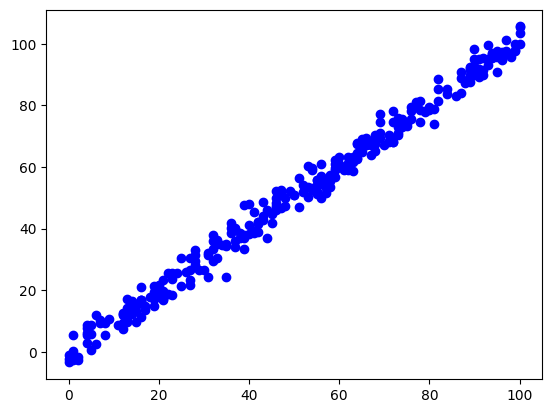

In [8]:
plt.scatter(X, y, c='b')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((240,), (60,))

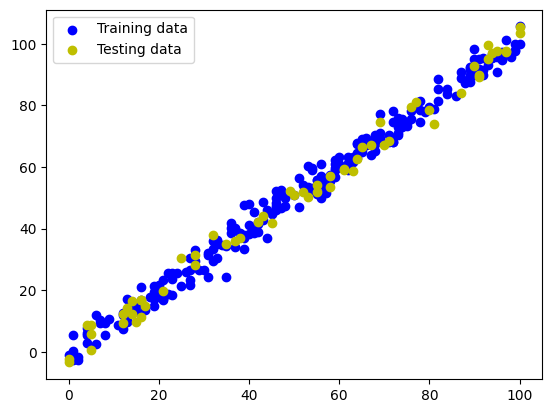

In [11]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

### model building"

In [12]:
# create a model
model = tf.keras.Sequential([ #sequential api
    tf.keras.layers.Dense(4,input_shape=(1,)), #Hidden layer 4i input shape 1i hidden on thrm layer hadanna puluan
    tf.keras.layers.Dense(1) #output layer 1i
])

# compile the model
model.compile(loss = tf.keras.losses.mae, #loss function
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #optimizer #stochastic gradient use krnath puluan
             metrics = ["mae"]) #metrics

# train the model
epoch_number = 4 #epoch number
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number) #x dedi 2d denna one tf.expand_dims

Epoch 1/4
8/8 [==============================] - 1s 3ms/step - loss: 4.0030 - mae: 4.0030
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 3.0152 - mae: 3.0152
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 2.5343 - mae: 2.5343
Epoch 4/4
8/8 [==============================] - 0s 3ms/step - loss: 2.4149 - mae: 2.4149


In [13]:
X_train.shape

(240,)

In [14]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [15]:
model.summary() #dense layer dekak use krnva first eke 8 aave hidden layer 4 weight bias term 4 =8 output layer weight 4+ bias 1 =5

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[89.74932 ],
       [75.767654],
       [93.74409 ],
       [ 4.860714],
       [90.74802 ]], dtype=float32)

In [17]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

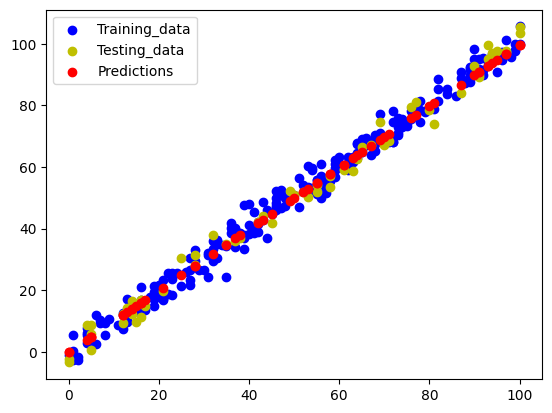

In [18]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

### evaluation

In [19]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 2.5219 - mae: 2.5219


[2.521901845932007, 2.521902322769165]

In [20]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)) #squeeze use krnne 1 dim krnna improv e krnna methan aai
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5219023>

In [21]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.535295>

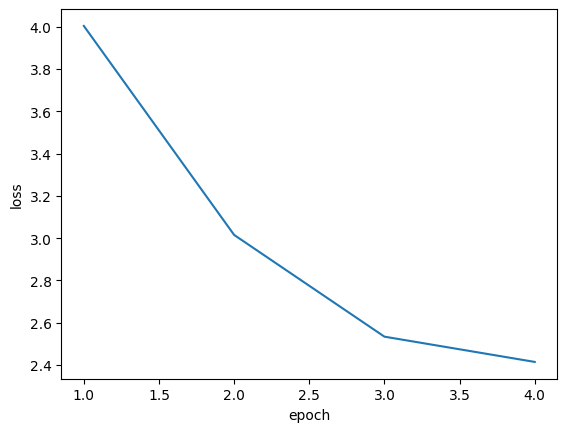

In [22]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()